In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
with open('ddarrung_final.pickle', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[[[], [5, 1.2, 2, 30], [5, 1.2, 2, 39], [7, 1.6, 12, 42], [7, 1.4, 9, 39], [6, 1.3, 9, 37], [8, 1.9, 2, 46], [7, 1.7, 8, 39], [8, 1.9, 9, 50], [20, 5.4, 31, 121], [20, 5.4, 9, 65], [11, 2.4, 14, 63], [9, 2.3, 4, 53], [10, 2.3, 4, 58], [12, 2.7, 12, 72], [12, 3.0, 7, 72], [29, 8.4, 32, 176], [16, 4.3, 10, 97], [16, 4.3, 10, 95], [18, 4.6, 18, 106], [18, 4.7, 10, 109], [20, 5.1, 18, 121], [34, 9.5, 33, 202], [18, 4.0, 21, 106], [22, 4.6, 41, 133], [23, 5.6, 18, 136], [17, 3.7, 20, 101], [17, 3.7, 20, 101], [16, 3.7, 20, 98], [15, 3.5, 20, 90], [20, 5.8, 12, 118], [17, 3.7, 20, 103], [18, 5.5, 12, 109], [19, 4.1, 20, 114], [20, 4.2, 38, 121], [21, 4.4, 34, 126], [20, 5.8, 12, 118], [18, 3.9, 20, 108], [22, 4.5, 33, 132], [25, 5.0, 50, 150], [24, 6.8, 12, 145], [20, 5.5, 12, 120], [15, 3.4, 19, 90], [4, 1.0, 2, 23], [5, 1.1, 2, 28], [15, 4.2, 11, 91], [9, 2.1, 2, 52], [16, 4.7, 12, 96], [16, 4.7, 38, 132], [24, 5.0, 39, 145], [27, 7.1, 34, 159], [23, 5.9, 24, 136], [22, 6.0, 14, 131], [17,

In [3]:
# 0은 시간(분)
# 1은 거리(km)
# 2는 고도차(m)
# 3은 소모칼로리(kcal)
lead_time=[]
distances=[]
altdif=[]
calories=[]

for i in range(0, len(data)):
    for j in range(0, len(data)):
        if data[i][j] == []:
            pass
        else: lead_time.append(data[i][j][0])

for i in range(0, len(data)):
    for j in range(0, len(data)):
        if data[i][j] == []:
            pass
        else: distances.append(data[i][j][1])

for i in range(0, len(data)):
    for j in range(0, len(data)):
        if data[i][j] == []:
            pass
        else: altdif.append(data[i][j][2])

for i in range(0, len(data)):
    for j in range(0, len(data)):
        if data[i][j] == []:
            pass
        else: calories.append(data[i][j][3])


In [4]:
lst = [lead_time,distances,altdif,calories]

df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

          0         1         2         3
0  1.000000  0.976435  0.520157  0.999326
1  0.976435  1.000000  0.462133  0.976371
2  0.520157  0.462133  1.000000  0.520409
3  0.999326  0.976371  0.520409  1.000000


In [5]:
def percentile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

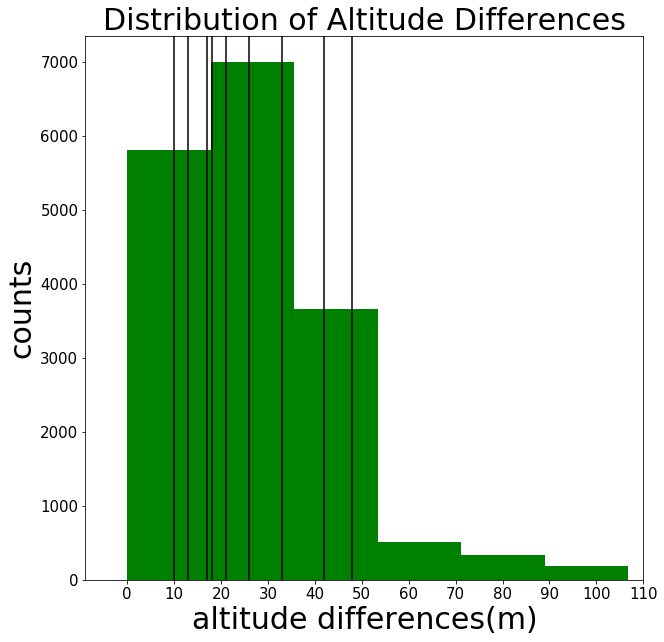

In [6]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(0, max(altdif), 10),size=15)
plt.yticks(size=15)
plt.hist(altdif, color='green')
plt.axvline(x=percentile(altdif,0.1), color='black')
plt.axvline(x=percentile(altdif,0.2), color='black')
plt.axvline(x=percentile(altdif,0.3), color='black')
plt.axvline(x=percentile(altdif,0.4), color='black')
plt.axvline(x=percentile(altdif,0.5), color='black')
plt.axvline(x=percentile(altdif,0.6), color='black')
plt.axvline(x=percentile(altdif,0.7), color='black')
plt.axvline(x=percentile(altdif,0.8), color='black')
plt.axvline(x=percentile(altdif,0.9), color='black')
plt.xlabel('altitude differences(m)',size=30)
plt.ylabel('counts', size= 30)
plt.title('Distribution of Altitude Differences', size=30)
plt.xlim(right= 110)
plt.show()

In [7]:
altdif_level=[]
for i in range(1,10):
    altdif_level.append(percentile(altdif, i*0.1))
altdif_level

[10, 13, 17, 18, 21, 26, 33, 42, 48]

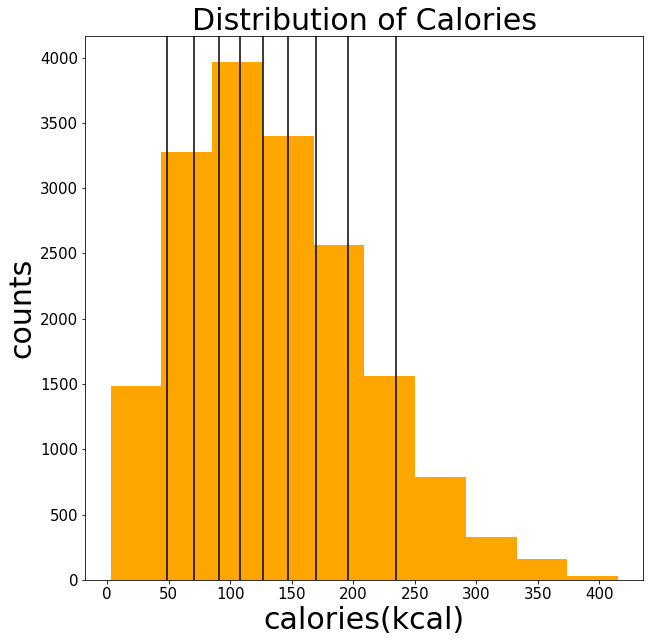

In [8]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(0, max(calories), 50),size=15)
plt.yticks(size=15)
plt.hist(calories, color='orange')
plt.axvline(x=percentile(calories,0.1), color='black')
plt.axvline(x=percentile(calories,0.2), color='black')
plt.axvline(x=percentile(calories,0.3), color='black')
plt.axvline(x=percentile(calories,0.4), color='black')
plt.axvline(x=percentile(calories,0.5), color='black')
plt.axvline(x=percentile(calories,0.6), color='black')
plt.axvline(x=percentile(calories,0.7), color='black')
plt.axvline(x=percentile(calories,0.8), color='black')
plt.axvline(x=percentile(calories,0.9), color='black')
plt.xlabel('calories(kcal)',size=30)
plt.ylabel('counts', size= 30)
plt.title('Distribution of Calories', size=30)
plt.show()

In [9]:
calories_level=[]
for i in range(1,10):
    calories_level.append(percentile(calories, i*0.1))
calories_level

[49, 71, 91, 108, 127, 147, 170, 196, 235]